In [119]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


sys.path.append("../")

In [2]:
diamonds = pd.read_csv("../data/train.csv",encoding = "ISO-8859-1")
final_test = pd.read_csv("../data/test.csv",encoding = "ISO-8859-1")
diamonds = diamonds.drop("id", axis=1)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [4]:
diamonds.shape

(40455, 10)

In [5]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [6]:
diamonds.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
depth,0.025089,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,0.182590,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,0.974516,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,0.950563,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,0.947930,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,0.920878,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


<AxesSubplot:>

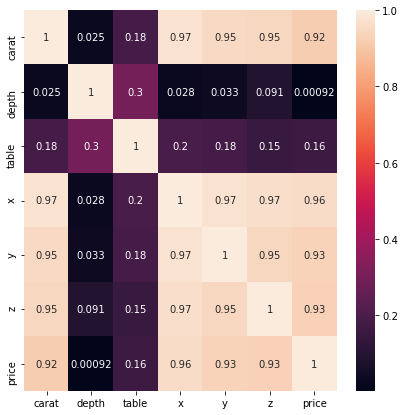

In [7]:
plt.figure(figsize=(7,7))
sns.heatmap(diamonds.corr().abs(), annot=True)

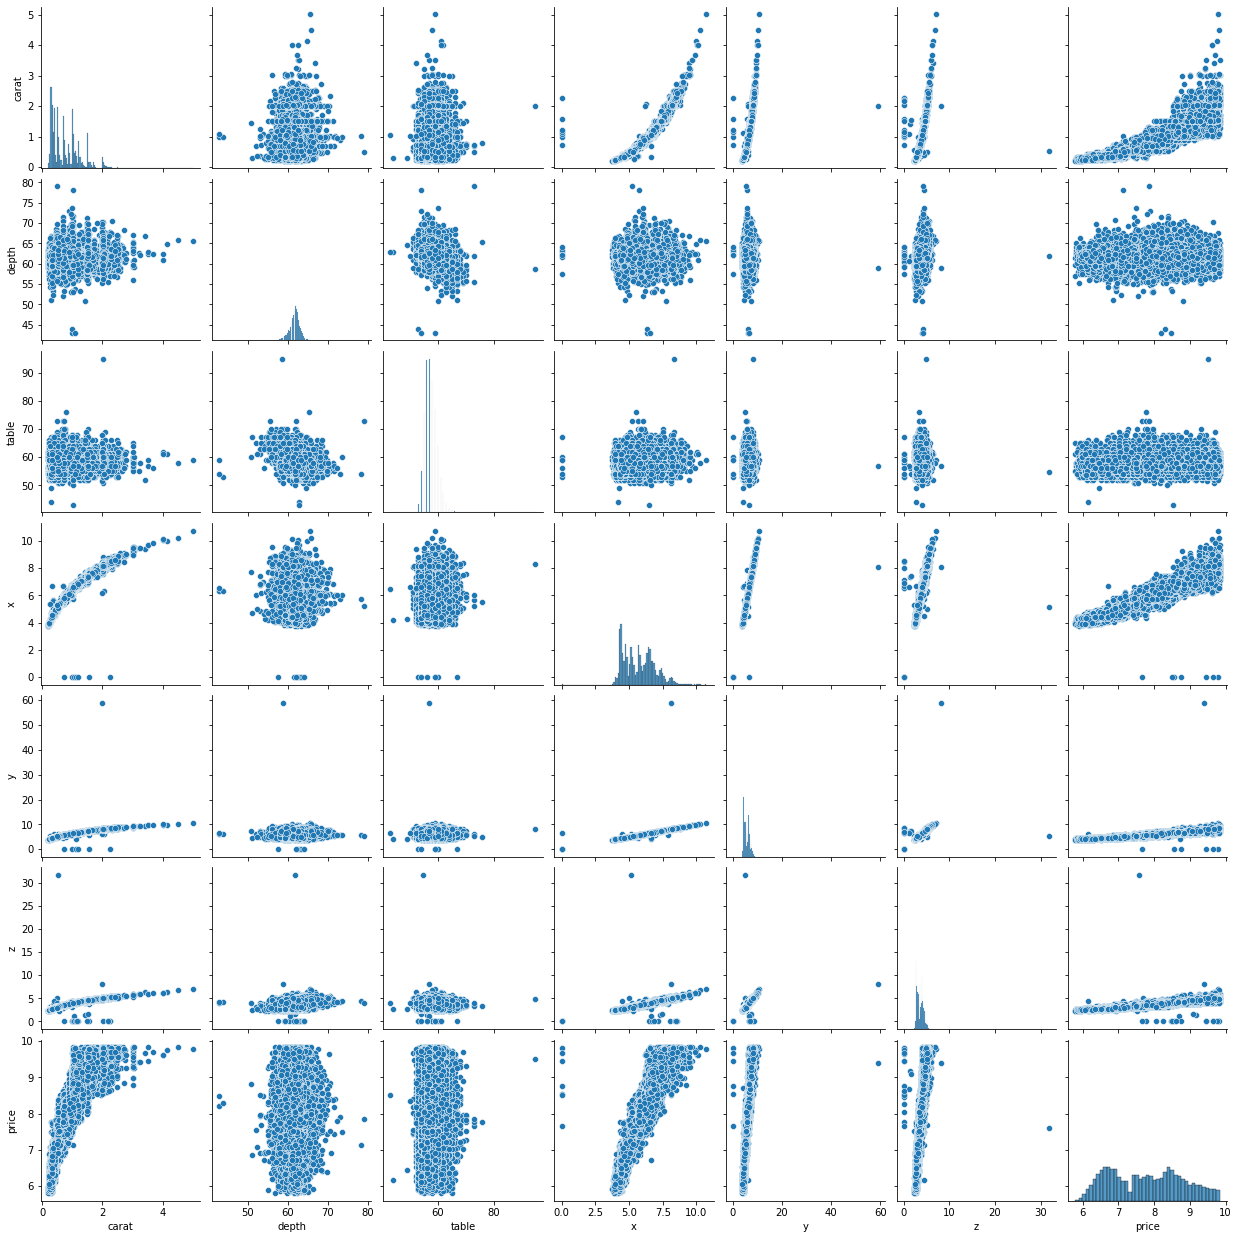

In [8]:
sns.pairplot(diamonds)

In [9]:
diamonds.isnull().sum().sort_values(ascending=False)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
diamonds.applymap(lambda x: x == "None").sum().sort_values(ascending=False)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
diamonds.applymap(lambda x: x == 0).sum().sort_values(ascending=False)

z          16
x           7
y           6
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
dtype: int64

In [12]:
y = diamonds["price"]
X = diamonds[["carat", "x", "y", "z"]]
X.head()

,carat,x,y,z
0,1.50,7.32,7.34,4.51
1,2.01,8.11,8.25,4.96
2,0.50,5.13,5.09,3.15
3,0.25,4.05,4.08,2.50
4,0.52,5.16,5.19,3.21


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])


pipe.fit(X_train, y_train)


y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)

mse_train, mse_test

(0.07936702511476795, 0.08724463115013893)

In [14]:
pipe.fit(X, y)
X_final = final_test[["carat", "x", "y", "z"]]

y_final = pipe.predict(X_final)
final = pd.DataFrame(final_test["id"])
final["price"] = pipe.predict(X_final)

In [15]:
final.head()

,id,price
0,0,7.328431
1,1,8.379287
2,2,7.524303
3,3,8.186063
4,4,9.825542


In [17]:
final.to_csv("final.csv", index = False, header = True)


### Random forest

In [24]:
y = diamonds["price"]
X = diamonds.drop("price", axis=1)


Diamond' cuts can be ordered by quality, Ideal is the best, Fair is the worst cut.

In [25]:
X["cut"].value_counts(dropna=False)

Ideal        16250
Premium      10336
Very Good     9066
Good          3604
Fair          1199
Name: cut, dtype: int64

In [26]:
encod = {
    "Fair":4,
    "Good":6,
    "Very Good":8,
    "Premium":9,
    "Ideal":10
}
X["cut"] = X["cut"].apply(lambda x: encod[x])
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,9,F,VS2,61.5,58.0,7.32,7.34,4.51
1,2.01,8,E,SI2,60.6,59.0,8.11,8.25,4.96
2,0.50,10,E,SI1,61.6,57.0,5.13,5.09,3.15
3,0.25,8,F,VVS2,61.6,57.0,4.05,4.08,2.50
4,0.52,10,G,VS2,62.0,55.0,5.16,5.19,3.21


In [27]:
X["color"].value_counts(dropna=False)

G    8523
E    7322
F    7141
H    6241
D    5028
I    4075
J    2125
Name: color, dtype: int64

In [28]:
encod = {
    "D":6,
    "E":5,
    "F":4,
    "G":3,
    "H":2,
    "I":1,
    "J":0
}
X["color"] = X["color"].apply(lambda x: encod[x])
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,9,4,VS2,61.5,58.0,7.32,7.34,4.51
1,2.01,8,5,SI2,60.6,59.0,8.11,8.25,4.96
2,0.50,10,5,SI1,61.6,57.0,5.13,5.09,3.15
3,0.25,8,4,VVS2,61.6,57.0,4.05,4.08,2.50
4,0.52,10,3,VS2,62.0,55.0,5.16,5.19,3.21


In [29]:
X["clarity"].value_counts(dropna=False)

SI1     9815
VS2     9199
SI2     6887
VS1     6171
VVS2    3837
VVS1    2689
IF      1327
I1       530
Name: clarity, dtype: int64

In [30]:
encod = {
    "IF":10,
    "VVS1":9,
    "VVS2":8,
    "VS1":7,
    "VS2":6,
    "SI1":5,
    "SI2":4,
    "I1":3
}
X["clarity"] = X["clarity"].apply(lambda x: encod[x])
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,9,4,6,61.5,58.0,7.32,7.34,4.51
1,2.01,8,5,4,60.6,59.0,8.11,8.25,4.96
2,0.50,10,5,5,61.6,57.0,5.13,5.09,3.15
3,0.25,8,4,8,61.6,57.0,4.05,4.08,2.50
4,0.52,10,3,6,62.0,55.0,5.16,5.19,3.21


In [22]:
#X = pd.get_dummies(X)

In [31]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,9,4,6,61.5,58.0,7.32,7.34,4.51
1,2.01,8,5,4,60.6,59.0,8.11,8.25,4.96
2,0.50,10,5,5,61.6,57.0,5.13,5.09,3.15
3,0.25,8,4,8,61.6,57.0,4.05,4.08,2.50
4,0.52,10,3,6,62.0,55.0,5.16,5.19,3.21


In [133]:
model = RandomForestRegressor()
params = {
    "n_estimators":[200, 210], 
    "max_depth":[36, 38, 40, 42, 44, 46], 
    "min_samples_split":[2], 
    "min_samples_leaf":[2]
}

In [134]:
clf = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs = -1)

In [135]:
clf.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.6min finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [36, 38, 40, 42, 44, 46],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [200, 210]},
             verbose=2)

In [136]:
best = clf.best_estimator_
best

RandomForestRegressor(max_depth=38, min_samples_leaf=2, n_estimators=200)

In [137]:
clf.best_params_

{'max_depth': 38,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.0022760042862449256, 0.002097903343206096)

In [144]:
cross_val_score(estimator=RandomForestRegressor(max_depth=38, min_samples_leaf=2, n_estimators=200), X=X, y=y, cv=10)

array([0.99166182, 0.98986024, 0.9919158 , 0.9923713 , 0.99231993,
       0.99229481, 0.99150234, 0.99242604, 0.99264182, 0.9914297 ])

In [178]:
#best.fit(X, y)
#X_final = final_test[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
#X_final = pd.get_dummies(X_final)

#y_final = best.predict(X_final)
#final = pd.DataFrame(final_test["id"])
#final["price"] = best.predict(X_final)

#final.to_csv("forest28_2_2_250.csv", index = False, header = True)

In [139]:
best.fit(X, y)
X_final = final_test[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]

In [140]:
encod1 = {
    "Fair":4,
    "Good":6,
    "Very Good":8,
    "Premium":9,
    "Ideal":10
}

X_final["cut"] = X_final["cut"].apply(lambda x: encod1[x])

encod2 = {
    "D":6,
    "E":5,
    "F":4,
    "G":3,
    "H":2,
    "I":1,
    "J":0
}

X_final["color"] = X_final["color"].apply(lambda x: encod2[x])

encod3 = {
    "IF":10,
    "VVS1":9,
    "VVS2":8,
    "VS1":7,
    "VS2":6,
    "SI1":5,
    "SI2":4,
    "I1":3
}

X_final["clarity"] = X_final["clarity"].apply(lambda x: encod3[x])

X_final.head()

<ipython-input-140-b0f695cad442>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final["cut"] = X_final["cut"].apply(lambda x: encod1[x])
<ipython-input-140-b0f695cad442>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final["color"] = X_final["color"].apply(lambda x: encod2[x])
<ipython-input-140-b0f695cad442>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,carat,cut,color,clarity,depth,table,x,y,z
0,0.51,8,5,4,58.3,61.9,5.19,5.20,3.04
1,1.02,8,4,4,63.0,58.0,6.37,6.43,4.03
2,0.59,10,6,6,61.9,56.0,5.39,5.34,3.32
3,0.90,8,6,6,62.3,56.0,6.14,6.18,3.84
4,2.01,9,0,7,60.2,61.0,8.23,8.16,4.93


In [141]:
y_final = best.predict(X_final)
final = pd.DataFrame(final_test["id"])
final["price"] = best.predict(X_final)

In [142]:
final.head()

,id,price
0,0,7.062194
1,1,8.350359
2,2,7.674096
3,3,8.505973
4,4,9.537504


In [143]:
final.to_csv("forest_38_2_2_200.csv", index = False, header = True)